In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img = cv2.imread("Tamil.jpg")

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

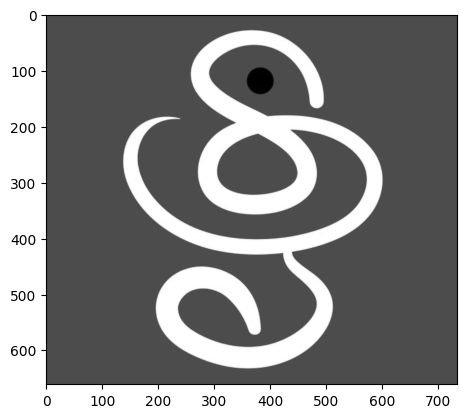

In [16]:
plt.imshow(gray, cmap='gray')

1. Implement a program to segment an image

    ·         By calculating a threshold setting using the histogram of brightness values.

    ·         Using adaptive thresholding

    ·         Using watershed algorithm

In [17]:
histogram, bin_edges = np.histogram(gray, bins=256)

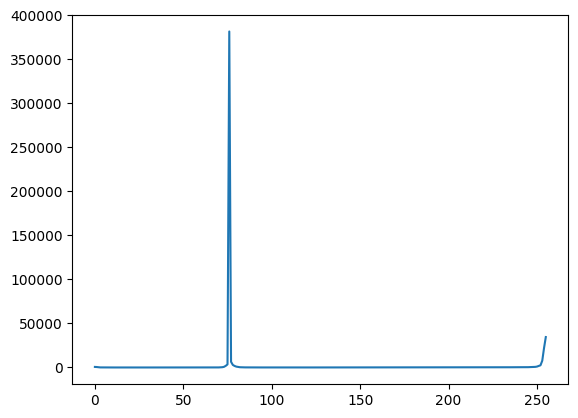

In [18]:
plt.plot(histogram)

In [19]:
mask = gray < 250

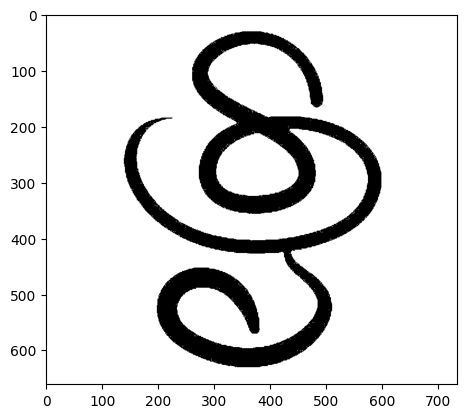

In [20]:
plt.imshow(mask, cmap='gray')

In [21]:
ada_mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

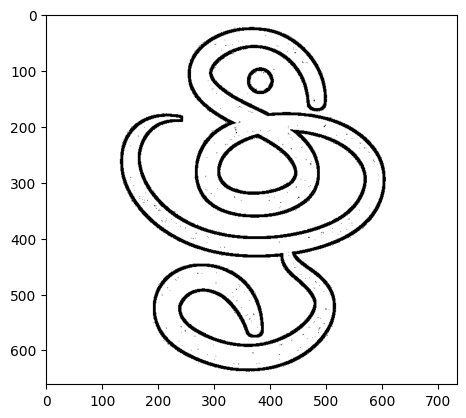

In [22]:
plt.imshow(ada_mask, cmap='gray')

In [57]:
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255, 255]  # Mark boundaries in red

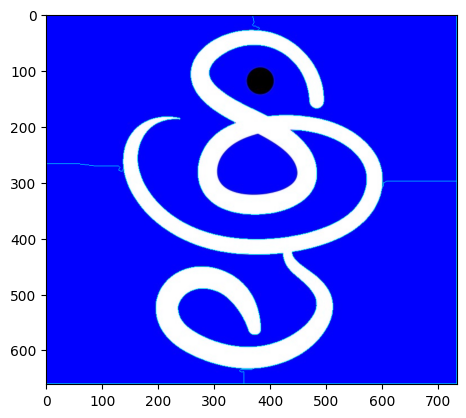

In [58]:
plt.imshow(img)

2. Try to apply the morphological transform


    ·         erosion and dilation with a circular structuring element

    ·         erosion and dilation with a square structuring element

    ·         closing and opening with a cross shaped structuring element

In [41]:
kernel_size = 9
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

erosion = cv2.erode(gray, kernel, iterations=1)
dilation = cv2.dilate(gray, kernel, iterations=1)


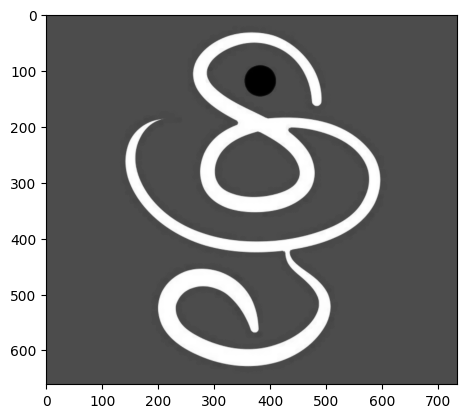

In [42]:
plt.imshow(erosion, cmap='gray')

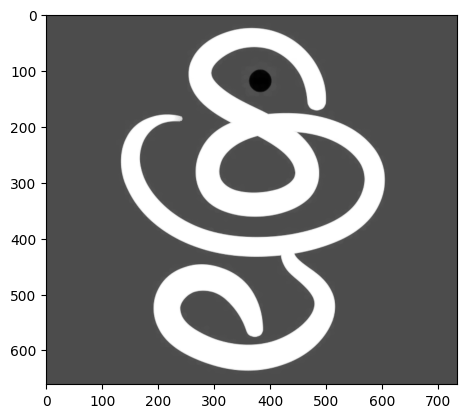

In [43]:
plt.imshow(dilation, cmap='gray')

In [44]:
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), np.uint8)

erosion = cv2.erode(gray, kernel, iterations=1)
dilation = cv2.dilate(gray, kernel, iterations=1)

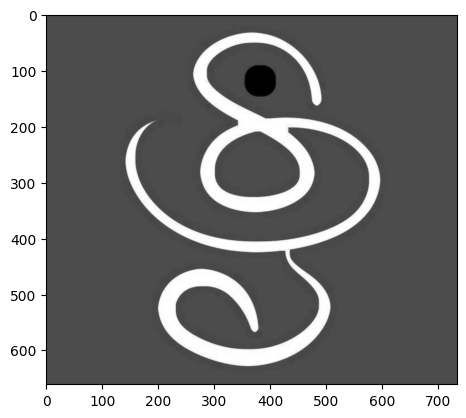

In [45]:
plt.imshow(erosion, cmap='gray')

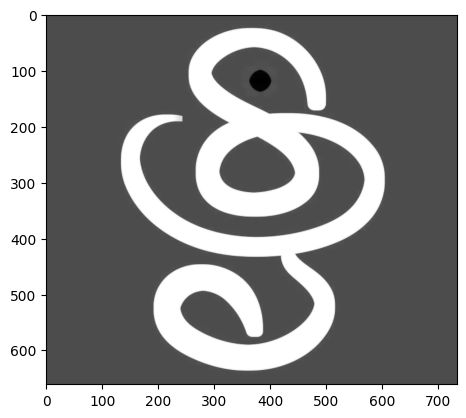

In [46]:
plt.imshow(dilation, cmap='gray')

In [49]:
kernel_size = 9
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))

closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

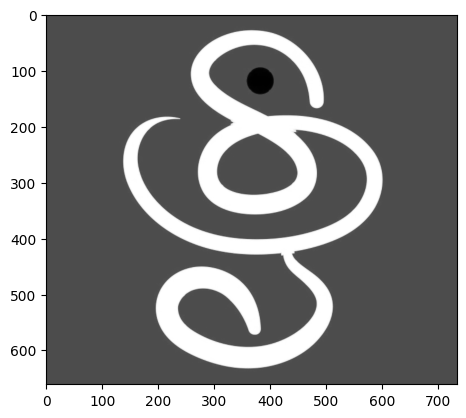

In [50]:
plt.imshow(closing, cmap='gray')

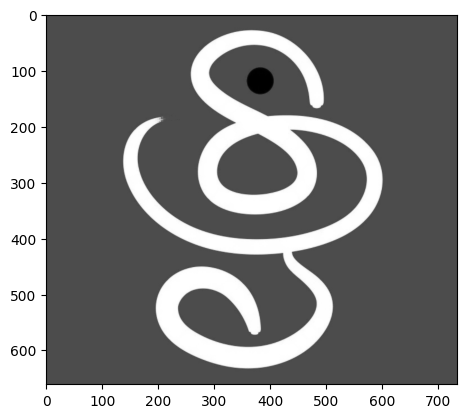

In [51]:
plt.imshow(opening, cmap='gray')